# Keras Classification Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

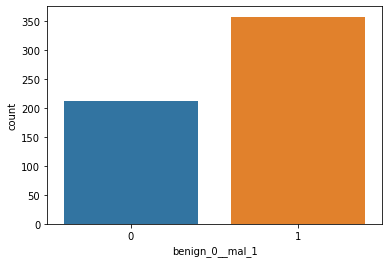

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

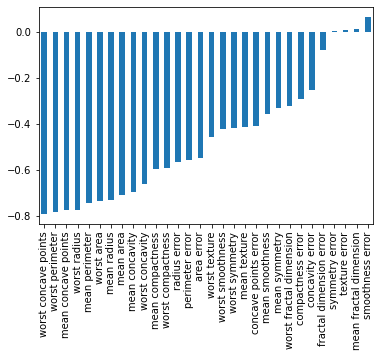

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

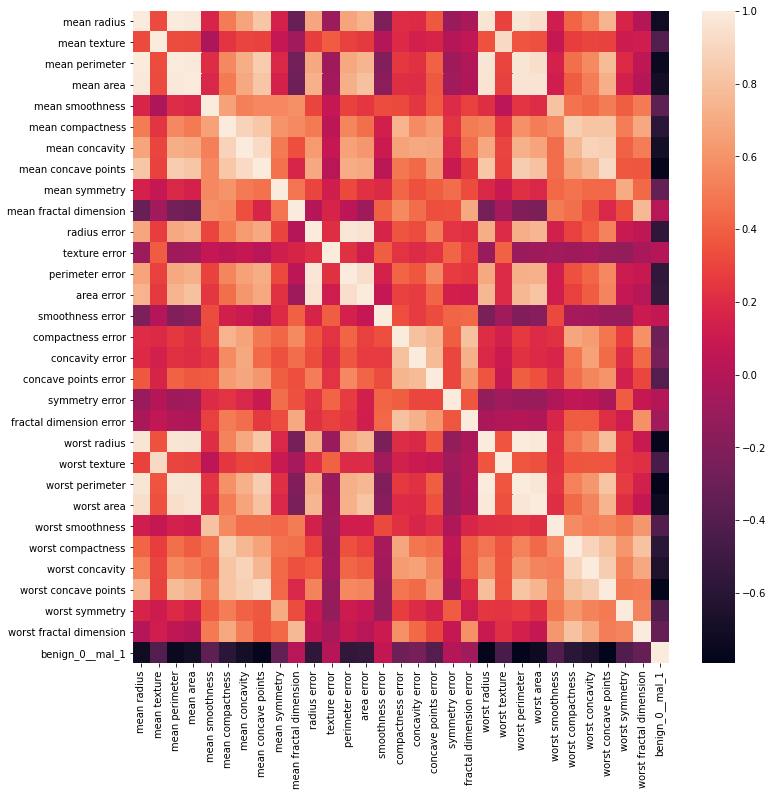

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

# Train Test Split

In [12]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

# Creating the Model

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Dropout

In [21]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
#BINARAY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Training the Model 
First Model:Choosing too many epochs and overfitting

In [24]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6715 - val_loss: 0.6223
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5976 - val_loss: 0.5560
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5350 - val_loss: 0.4992
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4793 - val_loss: 0.4467
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4302 - val_loss: 0.3967
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3801 - val_loss: 0.3459
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3373 - val_loss: 0.3046
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2996 - val_loss: 0.2697
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2670 - val_loss: 0.2445
Epoch 10/600
14/14 [==============================] - 0s 1ms/step - loss: 0.2422 - val_loss: 0.2205
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.1011
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.1057
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0465 - val_loss: 0.1027
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0469 - val_loss: 0.1039
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0458 - val_loss: 0.0973
Epoch 88/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0466 - val_loss: 0.1074
Epoch 89/600
14/14 [==============================] - 0s 839us/step - loss: 0.0483 - val_loss: 0.1122
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0467 - val_loss: 0.1039
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0467 - val_loss: 0.1011
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0463 - val_loss: 0.1094
Epoch 93/60

14/14 [==============================] - 0s 2ms/step - loss: 0.0330 - val_loss: 0.1151
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1143
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.1327
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1160
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0325 - val_loss: 0.1140
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0337 - val_loss: 0.1171
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.1197
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.1124
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.1280
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.1095
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - val_loss: 0.1220
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 0.1353
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.1342
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.1292
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0245 - val_loss: 0.1362
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.1258
Epoch 251/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0225 - val_loss: 0.1307
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1357
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.1296
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.1256
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0162 - val_loss: 0.1459
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.1488
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.1523
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.1486
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.1644
Epoch 331/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0160 - val_loss: 0.1500
Epoch 332/600
14/14 [==============================] - 0s 984us/step - loss: 0.0153 - val_loss: 0.1571
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1621
Epoch 334/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0161 - val_loss: 0.1453
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.1558
Ep

14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.1757
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.1797
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.1892
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.1719
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.1911
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.1692
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.1783
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1801
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.1932
Epoch 416/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0108 - val_loss: 0.1729
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.2130
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.1940
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.1946
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.2060
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.2111
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.1884
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.2484
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.1888
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.2249
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.1936
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.2399
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.2264
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.2412
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.2467
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.2319
Epoch 574/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 0.2481
Epoch 575/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.2237
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.2417
Epoch 577/600
14/14 [==============================] - 0s 846us/step - loss: 0.0044 - val_loss: 0.2362
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0043 - val_loss: 0.2312
Ep

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

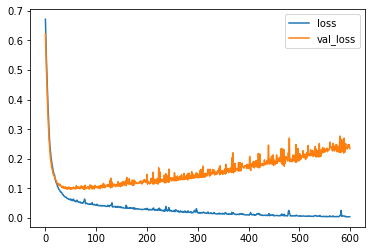

In [28]:
losses.plot()

In [29]:
# The plot shows that the model is overfitting

# Second Model:Early Stopping
use early stopping to track the val_loss and stop training once it begins increasing too much!

In [30]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6911 - val_loss: 0.6584
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6343 - val_loss: 0.6056
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5843 - val_loss: 0.5557
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5354 - val_loss: 0.5057
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4893 - val_loss: 0.4576
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4427 - val_loss: 0.4101
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4013 - val_loss: 0.3674
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3637 - val_loss: 0.3304
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3259 - val_loss: 0.2938
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2959 - val_loss: 0.2657
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.1125
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.1098
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.1181
Epoch 86/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0531 - val_loss: 0.1169
Epoch 00086: early stopping


<AxesSubplot:>

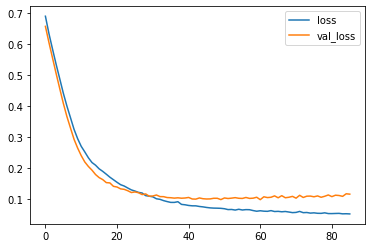

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
Third Model: Adding in DropOut Layers

In [36]:
from tensorflow.keras.layers import Dropout

In [37]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7072 - val_loss: 0.6844
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6825 - val_loss: 0.6656
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6590 - val_loss: 0.6441
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6504 - val_loss: 0.6203
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6138 - val_loss: 0.5918
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6271 - val_loss: 0.5669
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5836 - val_loss: 0.5431
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5654 - val_loss: 0.5159
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5569 - val_loss: 0.4920
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5247 - val_loss: 0.4598
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1159 - val_loss: 0.0956
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1058 - val_loss: 0.1060
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1243 - val_loss: 0.0949
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0943 - val_loss: 0.0904
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1081 - val_loss: 0.0935
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1089 - val_loss: 0.1031
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1120 - val_loss: 0.0968
Epoch 90/600
14/14 [==============================] - 0s 938us/step - loss: 0.1192 - val_loss: 0.0939
Epoch 91/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1005 - val_loss: 0.0926
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1201 - val_loss: 0.0937
Epoch 93/60

In [39]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

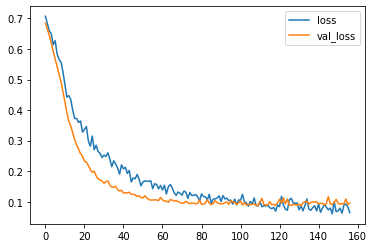

In [40]:
model_loss.plot()

# Model Evaluation

In [52]:
predictions = model.predict(X_test)
predictions = np.int64(predictions>0.5)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]
